### The German Traffic Sign Benchmark

Student Name 1: Sandra Gómez Gálvez

Student Name 2: Héctor Felipe Mateo Romero

### 1. Download data

In [1]:
"""
# Download the data base
!wget -c http://www.dia.fi.upm.es/~lbaumela/FullIJCNN2013.zip
"""

In [2]:
"""
!unzip FullIJCNN2013.zip
"""

### 2. Import Libraries

In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.utils import np_utils

### 3. Read data & data pre-processing

In [4]:
IMG_HEIGHT = 600
SIGN_SIZE = (224, 224)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [5]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', range(0,600), range(0,852))
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013', range(600,900), range(852,1213))

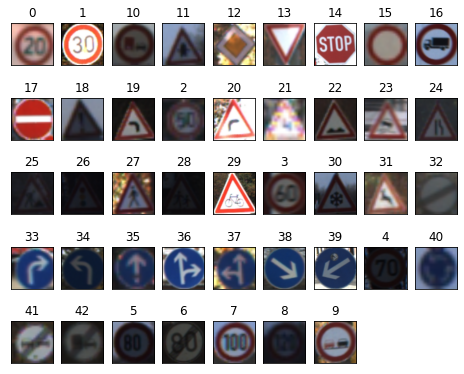

In [6]:
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
tr_signs = np.array(train_signs)[0:600]
tr_labels = np.array(train_labels)[0:600] 
va_signs = np.array(train_signs)[600:852]  
va_labels = np.array(train_labels)[600:852]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

In [8]:
print(len(train_signs))

852


In [9]:
print(tr_signs.shape)
print(tr_labels.shape)
print(tr_labels.shape[0]+va_labels.shape[0]+te_labels.shape[0])

(600, 224, 224, 3)
(600, 43)
1213


In [10]:
print(va_signs.shape)
print(va_labels.shape)

(252, 224, 224, 3)
(252, 43)


In [11]:
print(te_signs.shape)
print(te_labels.shape)
print(te_signs[360])

(361, 224, 224, 3)
(361, 43)
[[[0.14901961 0.14509805 0.1764706 ]
  [0.14901961 0.14509805 0.1764706 ]
  [0.14901961 0.14509805 0.1764706 ]
  ...
  [0.10980392 0.10980392 0.1254902 ]
  [0.10980392 0.10980392 0.1254902 ]
  [0.10980392 0.10980392 0.1254902 ]]

 [[0.14901961 0.14509805 0.1764706 ]
  [0.14901961 0.14509805 0.1764706 ]
  [0.14901961 0.14509805 0.1764706 ]
  ...
  [0.10980392 0.10980392 0.1254902 ]
  [0.10980392 0.10980392 0.1254902 ]
  [0.10980392 0.10980392 0.1254902 ]]

 [[0.14901961 0.14509805 0.1764706 ]
  [0.14901961 0.14509805 0.1764706 ]
  [0.14901961 0.14509805 0.1764706 ]
  ...
  [0.10980392 0.10980392 0.1254902 ]
  [0.10980392 0.10980392 0.1254902 ]
  [0.10980392 0.10980392 0.1254902 ]]

 ...

 [[0.11764706 0.11372549 0.11372549]
  [0.11764706 0.11372549 0.11372549]
  [0.11764706 0.11372549 0.11372549]
  ...
  [0.1254902  0.1254902  0.16078432]
  [0.1254902  0.1254902  0.16078432]
  [0.1254902  0.1254902  0.16078432]]

 [[0.11764706 0.11372549 0.11372549]
  [0.117

In [12]:
# Tensorboard
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

### Assignment 1: Multi-Layer Perceptron

#### Compile the model

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers, regularizers

mlp = Sequential()
mlp.add(Flatten(input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3)))
mlp.add(Dense(150, activation="elu", kernel_initializer="he_normal"))
Dropout(rate=0.8)
mlp.add(Dense(100, activation="elu", kernel_initializer="he_normal"))
Dropout(rate=0.4)
mlp.add(Dense(80, activation="elu", kernel_initializer="he_normal"))
Dropout(rate=0.2)
mlp.add(Dense(num_classes, activation='softmax'))

opt = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
mlp.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 150)               22579350  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_3 (Dense)              (None, 43)                3483      
Total params: 22,606,013
Trainable params: 22,606,013
Non-trainable params: 0
_________________________________________________________________


#### Train the model

In [14]:
data = mlp.fit(tr_signs, tr_labels, batch_size=100, epochs=100, verbose=2, validation_data=(va_signs, va_labels), callbacks=[tensorboard])

start = time()


Epoch 1/100
6/6 - 2s - loss: 4.1620 - accuracy: 0.0433 - val_loss: 3.8433 - val_accuracy: 0.1151
Epoch 2/100
6/6 - 1s - loss: 3.5414 - accuracy: 0.1633 - val_loss: 3.4245 - val_accuracy: 0.1627
Epoch 3/100
6/6 - 1s - loss: 3.1805 - accuracy: 0.2000 - val_loss: 3.2037 - val_accuracy: 0.1825
Epoch 4/100
6/6 - 1s - loss: 2.8689 - accuracy: 0.2850 - val_loss: 3.1546 - val_accuracy: 0.2341
Epoch 5/100
6/6 - 1s - loss: 2.6573 - accuracy: 0.3100 - val_loss: 3.0235 - val_accuracy: 0.2817
Epoch 6/100
6/6 - 1s - loss: 2.4194 - accuracy: 0.3617 - val_loss: 2.5989 - val_accuracy: 0.3690
Epoch 7/100
6/6 - 1s - loss: 2.2588 - accuracy: 0.4183 - val_loss: 2.5536 - val_accuracy: 0.3651
Epoch 8/100
6/6 - 1s - loss: 2.1383 - accuracy: 0.4433 - val_loss: 2.3353 - val_accuracy: 0.4048
Epoch 9/100
6/6 - 1s - loss: 1.9867 - accuracy: 0.5017 - val_loss: 2.2944 - val_accuracy: 0.4048
Epoch 10/100
6/6 - 1s - loss: 1.8440 - accuracy: 0.5583 - val_loss: 2.1669 - val_accuracy: 0.4524
Epoch 11/100
6/6 - 1s - loss:

Epoch 85/100
6/6 - 1s - loss: 0.1478 - accuracy: 0.9950 - val_loss: 1.0899 - val_accuracy: 0.7579
Epoch 86/100
6/6 - 1s - loss: 0.1425 - accuracy: 0.9900 - val_loss: 1.0839 - val_accuracy: 0.7460
Epoch 87/100
6/6 - 1s - loss: 0.1454 - accuracy: 0.9850 - val_loss: 1.0641 - val_accuracy: 0.7738
Epoch 88/100
6/6 - 1s - loss: 0.1371 - accuracy: 0.9917 - val_loss: 1.0908 - val_accuracy: 0.7540
Epoch 89/100
6/6 - 1s - loss: 0.1348 - accuracy: 0.9867 - val_loss: 1.0717 - val_accuracy: 0.7817
Epoch 90/100
6/6 - 1s - loss: 0.1342 - accuracy: 0.9900 - val_loss: 1.0717 - val_accuracy: 0.7857
Epoch 91/100
6/6 - 1s - loss: 0.1299 - accuracy: 0.9917 - val_loss: 1.0709 - val_accuracy: 0.7817
Epoch 92/100
6/6 - 2s - loss: 0.1287 - accuracy: 0.9900 - val_loss: 1.0647 - val_accuracy: 0.7738
Epoch 93/100
6/6 - 1s - loss: 0.1252 - accuracy: 0.9933 - val_loss: 1.0694 - val_accuracy: 0.7857
Epoch 94/100
6/6 - 1s - loss: 0.1255 - accuracy: 0.9900 - val_loss: 1.0908 - val_accuracy: 0.7857
Epoch 95/100
6/6 - 1

#### Get the results

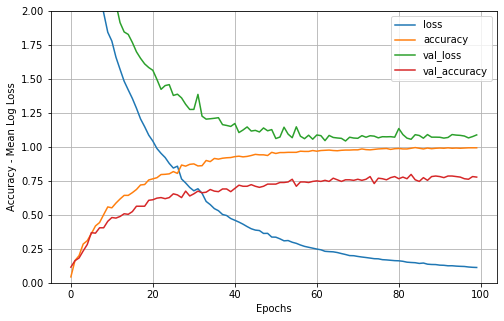

        loss  accuracy  val_loss  val_accuracy
99  0.112725  0.993333  1.088261      0.777778


In [15]:
results=pd.DataFrame(data.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()
print(results[-1:])

#### Final Test

In [17]:

loss, acc = mlp.evaluate(te_signs, te_labels, verbose=0)
end = time()
#print('MLP took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))


Test loss: 0.7868781089782715 - Accuracy: 0.8310249447822571
